## Class 5 Agenda:
  * **Brief introduction to machine learning**
  * **Linear Regression**
  * **Model Evaluation using Train/Test split**
  * **Logistic Regression** (next notebook)

### Brief introduction to Machine Learning

Up to this point, we've just been exploring data. Generating statistical summaries of different rows and columns in our datasets is useful and helps us answer certain kinds of questions about historical trends we see, but it gets us nowhere when we want to **predict** something useful using our data in the future. We've been doing description, but now we are going to move on to prediction.

Before we get started with actual machine learning, we need to understand some of the language used to describe the classes of problems that machine learning can be used to solve.

In the machine learning universe there are two kinds of problems:
  * **Supervised learning problems** involve constructing an accurate model that can **predict some kind of an outcome when past data has labels for those outcomes** [supervised learning wikipedia page](https://en.wikipedia.org/wiki/Supervised_learning)
  * **Unsupervised learning problems** involve constructing models where labels on historical data are unavailable.[unsupervised learning wikipedia page](https://en.wikipedia.org/wiki/Unsupervised_learning)

Today we will be talking about two **supervised learning** approaches.

Within the universe of supervised machine learning problems, there exist two distinct classes of problems.

These classes are based completely on the kind of value or values we are trying to predict:
  * A **classification problem** is a **supervised learning problem** where the objective is to learn to predict a categorical value.
  * A **regression problem** is a **supervised learning problem** where the objective is to learn to predict a continuous value.

We will start with learning about **linear regression**, a machine learning modeling approach that has classically been used for **regression** problems.

### Linear Regression Intro

Linear regression has been used extensively for a whole myriad of distinct regression problems in the past. 

Linear regression is the first model that we will learn because:
  * it is widely used
  * is very quick and easy to set up
  * a trained linear regression model is very easy to understand.
  
Really, it's critical to grok linear regression because it is the foundational machine learning modeling approach on which many other methods are based.

By the end of this notebook you will:

- Have a working conceptual understanding of linear regression and become familiar with some key terminology
- Be able to apply linear regression to a machine learning problem using scikit-learn
- Be able to interpret linear regression model coefficients
- Be able to apply three different evaluation metrics for regression
- Be able to use train/test split to estimate model performance on unseen data 
- Be able to articulate the strengths and weaknesses of linear regression

We will be using the default machine learning library in **Python**, [scikit-learn](http://scikit-learn.org/stable/), which has all of the functionality we will need to explore linear regression.

Let's get started by importing all of the functionality we will need for this lesson:

In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Reading in the car dataset

Now that we've got all of the libraries we need, lets get some data to work with.

This data comes from the famous [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/):

In [2]:
# read data into a DataFrame
data = pd.read_csv("../data/auto_mpg_data.csv")
print(data.dtypes)
print(data.head())
print(data.shape)

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
mpg             float64
dtype: object
   cylinders  displacement  horsepower  weight  acceleration   mpg
0          8         307.0       130.0  3504.0          12.0  18.0
1          8         350.0       165.0  3693.0          11.5  15.0
2          8         318.0       150.0  3436.0          11.0  18.0
3          8         304.0       150.0  3433.0          12.0  16.0
4          8         302.0       140.0  3449.0          10.5  17.0
(392, 6)


Each row in this dataset, called an **observation** represents **one car model** (392 models in the dataset).

Our goal will be to try to build a model that, when given some features describing a car model, can accurately predict the expected mpg of the vehicle.

What are the **features**? (What data can we use to generate our prediction?)

- **cylinders:** The number of cylinders in the model (numeric discrete)
- **displacement:** [engine displacement](https://en.wikipedia.org/wiki/Engine_displacement) (continuous)
- **horsepower:** horsepower of the model (continuous)
- **weight:** total weight of the car (continuous)
- **acceleration:** The vehicle acceleration rate of the model (continuous)

What is the **response**? (What are we trying to predict?)

- **mpg:** approximate miles per gallon of the model (continuous)

### You should immediately have questions about the data

1. Is there a relationship between any of the properties of the car models in our dataset?
2. How strong is that relationship?
3. Do any of the properties of the cars seem to relate to its mpg?
4. What is the effect of each car attribute on mpg?

### Visualize relationships among the features and the outcome

The quickest, most effective way you can quickly see if any of the features correlate with your response is to use a **scatter plot** to visualize them:

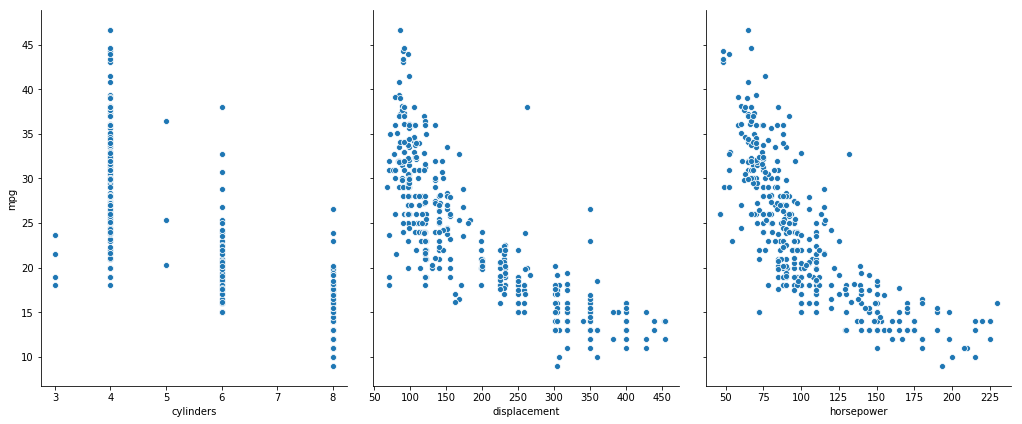

In [5]:
sns.pairplot(data, x_vars=['cylinders','displacement','horsepower'], y_vars='mpg', height=6, aspect=0.8);

Here we just tried to see if there was any relationship between cylinders/displacement/horsepower and mpg for each feature by itself. Looks like all 3 are negatively correlated with mpg.

If we wanted to see what the simple linear regression on each feature by itself looks like (we will get to what that actually is shortly), we can plot a regression line:

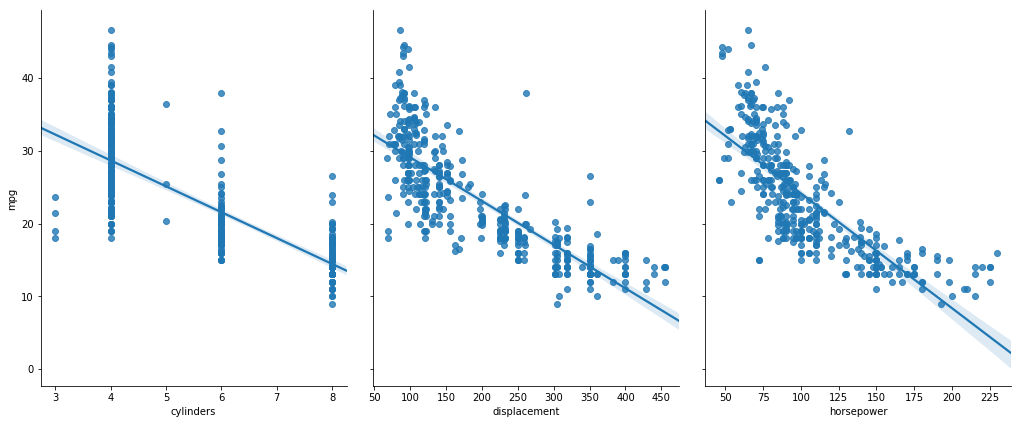

In [6]:
sns.pairplot(data, x_vars=['cylinders','displacement','horsepower'], y_vars='mpg', height=6, aspect=0.8, kind='reg')

We can also use a **scatter matrix** to visualize the relationship between all numerical variables using the `pairplot` functionality in [seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)

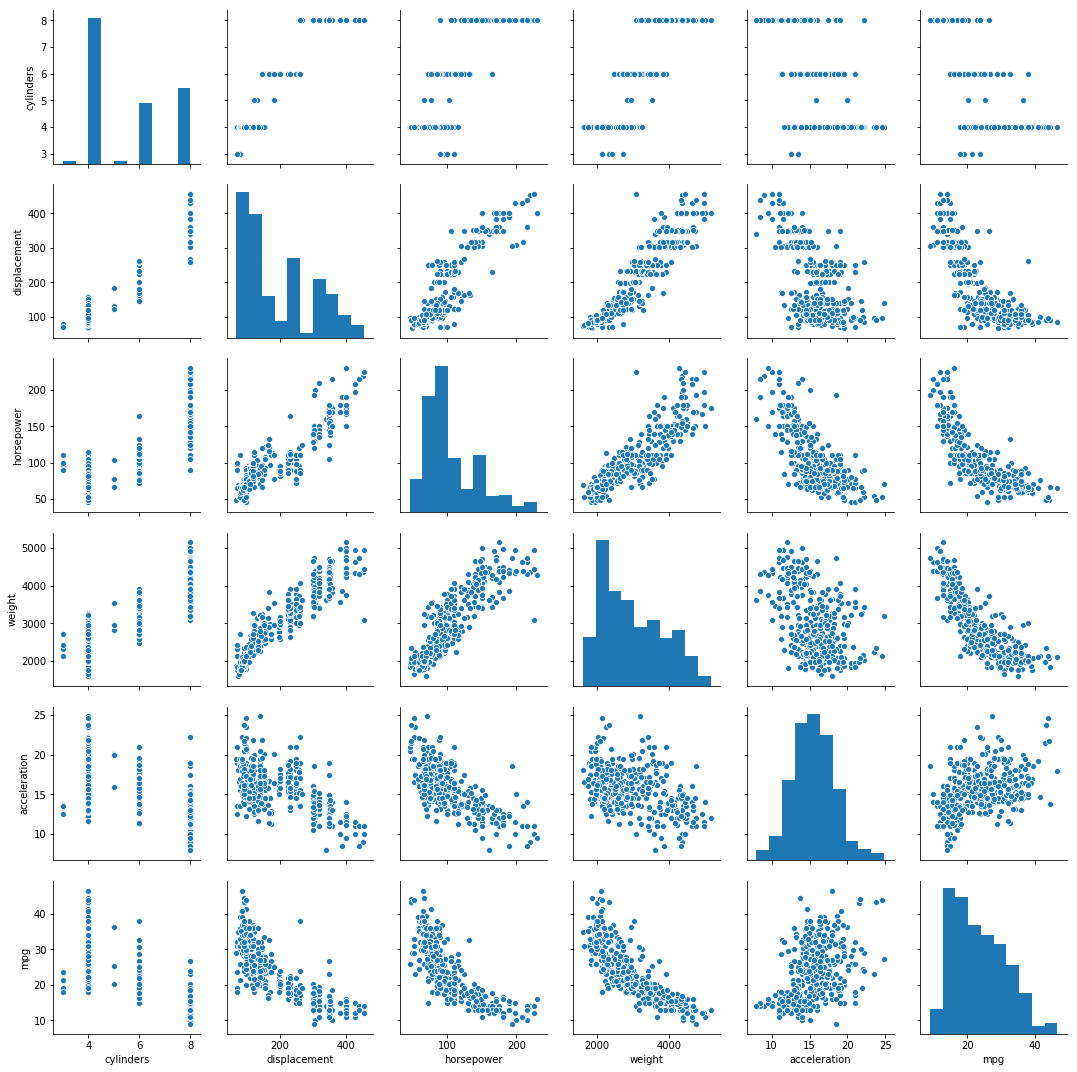

In [7]:
sns.pairplot(data)

Notice that the scatter matrix is square and symmetric, so the plots on either side of the diagonal are mirror images of each other.

It's only necessary to look at all of the plots on one side of the diagonal to see the relationships among all the features.

You should also use a **correlation matrix** to compute the pairwise correlations between all numeric variables.

Let's first just compute and inspect the correlation matrix:

In [8]:
auto_correlations = data.corr()
auto_correlations

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.423329
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,1.000000


Now, lets visualize the correlations using a `heatmap` to get a more "visual" understanding of the correlations among the data:

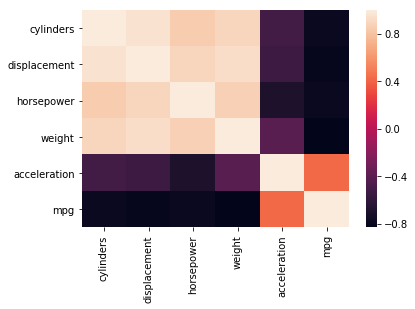

In [9]:
sns.heatmap(auto_correlations)

From the heatmap representation of the correlation matrix, we can quickly tell that cylinders, displacement, horespower, and weight are positively correlated, and are all anti-correlated with both acceleration and mpg (which themselves are weakly correlated).

Some of this should come as no suprise, when you think about it. The heavier a car is, the larger its engine, the larger its horsepower, the lower its mpg should be.

Ok, enough exploring, lets get to building some models.

### linear regression on one variable (simple linear regression)

Linear regression on one variable (simple linear regression) is an approach for predicting a **continuous response** using a **single feature**. Here's the mathy way of representing a simple linear regression model:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients**. They are the values of the model that we are going to attempt to estimate to maximize $y$.

$\beta_0$ is also called the bias (its an offset), and is equivalent to the y-intercept of the model

(remember $y = mx + b$ from grade school? $m=\beta_1$ and $b=\beta_0$ here).

So, **our model must "learn" the values of these coefficients, and once we've learned these coefficients, we can use the model to predict mpg.**

### Estimating ("learning") simple linear regression model coefficients

Coefficients are estimated during the model fitting process using the **least squares criterion**.

We will find the line (using math) which minimizes the **sum of squared errors**.

![Estimating coefficients](./images/least_squares.gif)

Note the following in the diagram:
  * The black dots are the **observed values** of x and y.
  * The thin black line is our **least squares line**.
  * The red line is an example **residual** or **error**, which is the distance between an observed value and the least squares line.

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** ($\Delta y/\Delta x$)

Let's estimate the model coefficients for our car data where we will use the `acceleration` of the car as our single feature to predict `mpg`.

We will use `scikit-learn` for the first time here and work through the process of training a scikit-learn model.

In [10]:
# create X and y
feature_cols = ['acceleration']
X = data[feature_cols]
y = data.mpg

# instantiate and fit
acc_linreg = LinearRegression()
acc_linreg.fit(X, y)

# print the coefficients
print("The y intercept:", acc_linreg.intercept_)
print("The single coefficient:", acc_linreg.coef_)

The y intercept: 4.833249804843799
The single coefficient: [1.19762419]


Ok, so what did we do here?

  1) We created a matrix `X` that held our features and a vector `y` that held our response variable across all the observations in our dataset.
  2) We then instantiated (created) a `LinearRegression` model. 
  3) However, that model was initially untrained (didn't have our data fit to it). In order to do that, we had to call the `fit` method of the `LinearRegression` object `acc_linreg` we had just created using our features `X` and outcome `y` as input parameters.
  4) After we called `fit` on our model, the simple linear regression model was fit (using math we don't have to worry about). Following this, we inspected our two coefficients.
  
Just to hammer all of this home, let's take a look at what this "visually" looks like using `pairplot`:

(0, 48.488790623335106)

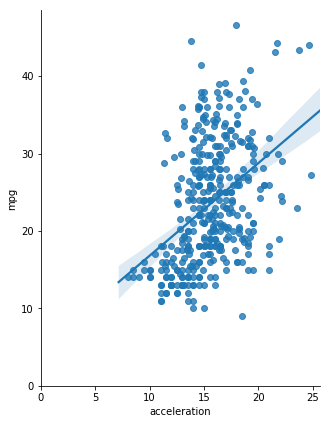

In [12]:
sns.pairplot(data,x_vars=['acceleration'],y_vars='mpg',height=6, aspect=0.8,kind='reg')
sns.mpl.pyplot.xlim(0,)
sns.mpl.pyplot.ylim(0,)

### How to interpret model coefficients

So, now that we've got a fitted linear regression model, how do we interpret the acceleration coefficient ($\beta_1$)?

A "unit" increase in accelerationis **associated with** a ~1.198 "unit" increase in mpg.

Meaning: An additional acceleration of 1 $m/s^2$ is **associated with** an increase ~1.198 miles per gallon.

Keep in mind that this is not a statement of **causation**, but of **correlation**.

What would the coefficient look like if an increase in acceleration was associated with a **decrease** in mpg?

### Using the model for prediction

Let's say that there was a new car model that had an acceleration of 28. What would we predict the mpg of that model to be?

$$y = \beta_0 + \beta_1x$$
$$y = 4.833 + 1.197 \times 28$$

In [13]:
# manually calculate it and confirm with the plot we created above. Does this value make sense?
4.833 + 1.197*28

38.349000000000004

In [15]:
# predict for a new observation, here where the acceleration is 30
acc_linreg.predict([[30]])

array([40.76197544])

So, we would predict mpg of **~41** for a model with acceleration of 30.

### Does the scale of the features matter?

Let's say that acceleration was measured in centimeters per second squared, rather than meters per second squared. How would that affect the model?

In [16]:
data['acceleration_centimeters'] = data.acceleration * 100
data.head()

,cylinders,displacement,horsepower,weight,acceleration,mpg,acceleration_centimeters
0,8,307.0,130.0,3504.0,12.0,18.0,1200.0
1,8,350.0,165.0,3693.0,11.5,15.0,1150.0
2,8,318.0,150.0,3436.0,11.0,18.0,1100.0
3,8,304.0,150.0,3433.0,12.0,16.0,1200.0
4,8,302.0,140.0,3449.0,10.5,17.0,1050.0


In [17]:
# create X and y
feature_cols = ['acceleration_centimeters']
X_2 = data[feature_cols]
y = data.mpg

# instantiate and fit
acc_linreg2 = LinearRegression()
acc_linreg2.fit(X, y)

# print the coefficients
print(acc_linreg2.intercept_)
print(acc_linreg2.coef_)

4.833249804843799
[1.19762419]


How do we interpret the new acceleration_centimeters coefficient ($\beta_1$)?

- A "unit" increase in acceleration is **associated with** a ~0.01198 "unit" increase in mpg.
- Meaning: An centimeter/second^2 acceleration increase is **associated with** an increase in mpg of 0.01198.
- Meaning: An additional 1 meter/second^2 acceleration increase is **associated with** an increase in mpg of ~1.198.

In [19]:
# predict for a new observation
acc_linreg2.predict([[3000]])

array([3597.705813])

So what does this mean?

**The scale of the features is irrelevant for linear regression models, since it will only affect the scale of the coefficients, and we simply change our _interpretation_ of the coefficients**

### How well does the model fit the data?

R-squared is a very common way to evaluate the overall fit of a linear model.
R-squared is defined as the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model. This value is between 0 and 1, where the higher the value is, the better the model is.

We can get r-squared from our model by getting the pearson-r coefficient from a fancy jointplot and squaring it:

R^2: 0.17920705015625457


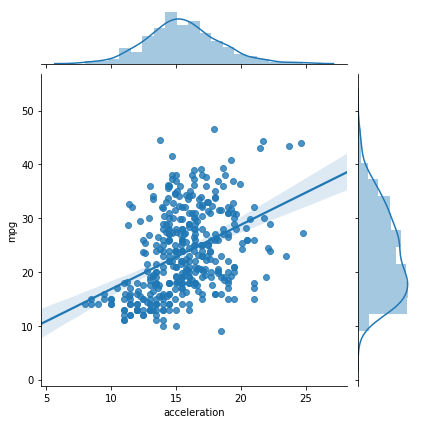

In [20]:
sns.jointplot('acceleration', 'mpg',data, kind="reg")
print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)

Let's confirm the R-squared value for our simple linear model using `scikit-learn's` prebuilt R-squared scorer:

In [21]:
y_pred = acc_linreg.predict(X)
metrics.r2_score(y, y_pred)

0.1792070501562546

Two things to keep in mind when using R-squared:
  * The threshold for a **"good" R-squared value** is highly dependent on the particular domain.
  * R-squared is more useful as a tool for **comparing models**.

### Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features, which is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient:

$y = \beta_0 + \beta_1 \times acceleration + \beta_2 \times displacement + \beta_3 \times horsepower$

In [22]:
# create X and y except now with more columns in X
mult_feature_cols = ['acceleration', 'displacement', 'horsepower']
X_mult = data[mult_feature_cols]
y_mult = data.mpg

# instantiate and fit like last time
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_
# print the coefficients like last time
print(intercept)
print(coeffs)

46.254707496859055
[-0.41222985 -0.03665995 -0.08878252]


In [23]:
# pair the feature names with the coefficients
list(zip(mult_feature_cols, multiple_linreg.coef_))

[('acceleration', -0.41222985131176376),
 ('displacement', -0.036659952890354786),
 ('horsepower', -0.08878252487814348)]

With this model we can interpret the coefficients as follows:

  * For a fixed amount of acceleration and engine displacement, an increase of 1 unit in **horsepower** is associated with a **decrease in mpg of the car of ~.09**.
  * For a fixed amount of displacement and horsepower, an increase of 1 m/s^2 in **acceleration** is associated with a **decrease in mpg of ~.41**.
  * For a fixed amount of acceleration and horsepower, an increase of 1 in **displacement** is associated with an **decrease in mpg of ~.04**.

Does this model have a better r^2 value?

In [24]:
y_mult_pred = multiple_linreg.predict(X_mult)
metrics.r2_score(y_mult, y_mult_pred)

0.6748704313006708

#### Exercise Time
* Create the multiple regression when you use every variable except for mpg to predict mpg.
* What is this new r^2 value?

In [25]:
pass

### Evaluation metrics for regression problems

In order to evaluate how good a given regression model is, we need evaluation metrics designed for comparing **continuous values**. We will cover 3 common evaluation metrics for regression models here.

Let's create some example numeric predictions, and calculate the three most common evaluation metrics for regression problems:

In [26]:
# define true and predicted response values
fake_y_true = [101, 40, 30, 20]
fake_y_pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors/residuals:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [27]:
print("MAE for fake data:",metrics.mean_absolute_error(fake_y_true, fake_y_pred))

MAE for fake data: 12.75


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [28]:
print("MSE for fake data:",metrics.mean_squared_error(fake_y_true,fake_y_pred))

MSE for fake data: 180.25


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [29]:
print("RMSE for fake data:",np.sqrt(metrics.mean_squared_error(fake_y_true, fake_y_pred)))

RMSE for fake data: 13.425721582097552


Lets compare these metrics in terms of their usefulness/interpretability:
  * **MAE** is the easiest to understand, because it's the average error.
  * **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
  * **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are what are called **loss functions**, because we want to minimize the **loss** (from getting stuff wrong).

#### Exercise Time
  * Calculate the MAE/MSE/RMSE of the simple linear regression model
  * Calculate the MAE/MSE/RMSE of the 3 feature multiple regression model
  * Calculate the MAE/MSE/RMSE of the model using all of the features
  * What do you notice about all of these metrics as you keep adding features?

In [30]:
pass

### Using train/test split for model evaluation

How do we know that our model will perform well on new data?

Sure, we may know that our model has really low RMSE on all of the data we have on hand, but can we be sure that it will be exactly the same when we try to use our model in the real world?

One way we can get an estimate of how the model will perform "in the wild" is by building the model on a portion of our data, and then testing it on the remainder that we have.

So, we **act like we have one set of data for model building, and keep a separate set of data and treat it as if it were new.** We then test our model on this "new" data, and, **as long as the test data was taken in an unbiased way**, we can assume that the **loss** on the test data gives us a pretty good idea of what the error "in the wild" will be.

So, let's try to use train/test split to estimate the model's accuracy on unseen data.

The basic approach would be to randomly select a fraction of the data (>50% usually) for training, and the remainder (100-training%) for testing. We will use scikit-learn's `train_test_split` function to do this:

In [31]:
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y_mult, test_size=0.3, random_state=1)
print("training data size:",X_mult_train.shape)
print("testing data size:",X_mult_test.shape)

training data size: (274, 3)
testing data size: (118, 3)


Now, we simply train on `X_mult_train` and `y_mult_train` and then generate predictions and evaluation metrics on `X_mult_test` and `y_mult_test`:

In [32]:
#train on training set
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_mult_train, y_mult_train)

#generate predictions on training set and evaluate
y_mult_pred_train = mult_linreg2.predict(X_mult_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_train, y_mult_pred_train)))

#generate predictions on test set and evaluate
y_mult_pred_test = mult_linreg2.predict(X_mult_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_test, y_mult_pred_test)))

Training set RMSE: 4.41382089426587
Test set RMSE: 4.604331577231552


Notice that the test set error is greater than the training set error. This should always be the case (why?).

#### Exercise Time
  * Get MAE/MSE/RMSE training and test set predictions on the full linear regression model (using all features) with a test set of 30% of the data
  * Get MAE/MSE/RMSE training and test set predictions on the full linear regression model (using all features) with a test set of 20% of the data
  * Get MAE/MSE/RMSE training and test set predictions on the full linear regression model (using all features) with a test set of 10% of the data
  * Anything you notice about the test set error metrics?

In [33]:
pass

### Summary of linear regression and comparison with other models (you will see in the future)

There are some obvious advantages to linear regression models:
  * These kinds of models are very simple to explain
  * They are highly interpretable
  * Model training and prediction is very fast
  * Features do not need to be scaled (we will talk about feature scaling later)
  * They can perform well with a small number of observations

However, linear regression also has some significant disadvantages:
  * It assumes a linear relationship between the features and the outcome. This isn't always (almost never) the case.
  * Performance is (generally) not competitive with the best supervised learning methods
  * When you have lots of features, this approach can become sensitive to useless features
  * This approach can't automatically learn feature interactions (although you can code them into a linear regression, will show you how to do that soon!)